In [1]:
import pandas as pd

df = pd.read_csv('car_price_prediction.csv') #загружаю данные

#Немного обработки данных
df['Levy'] = df['Levy'].replace('-', 0).astype(float)
df['Mileage'] = df['Mileage'].str.replace(' km', '').str.replace(' ', '').astype(float)
df['Engine volume'] = df['Engine volume'].str.replace(' Turbo', '').astype(float)
df['Leather interior'] = df['Leather interior'].map({'Yes': 1, 'No': 0})
df['Doors'] = df['Doors'].replace(['02-Mar', '04-May', '>5'], 4).astype(int)

# Проверим уникальные значения в столбце 'Doors' и наличие пропусков
print("Unique values in 'Doors':", df['Doors'].unique())
print("Missing values:\n", df.isnull().sum())



Unique values in 'Doors': [4]
Missing values:
 ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


C:\Users\savva\AppData\Local\Temp\ipykernel_4596\3848068499.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Doors'] = df['Doors'].replace(['02-Mar', '04-May', '>5'], 4).astype(int)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  float64
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  int64  
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  float64
 10  Mileage           19237 non-null  float64
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  int64  
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

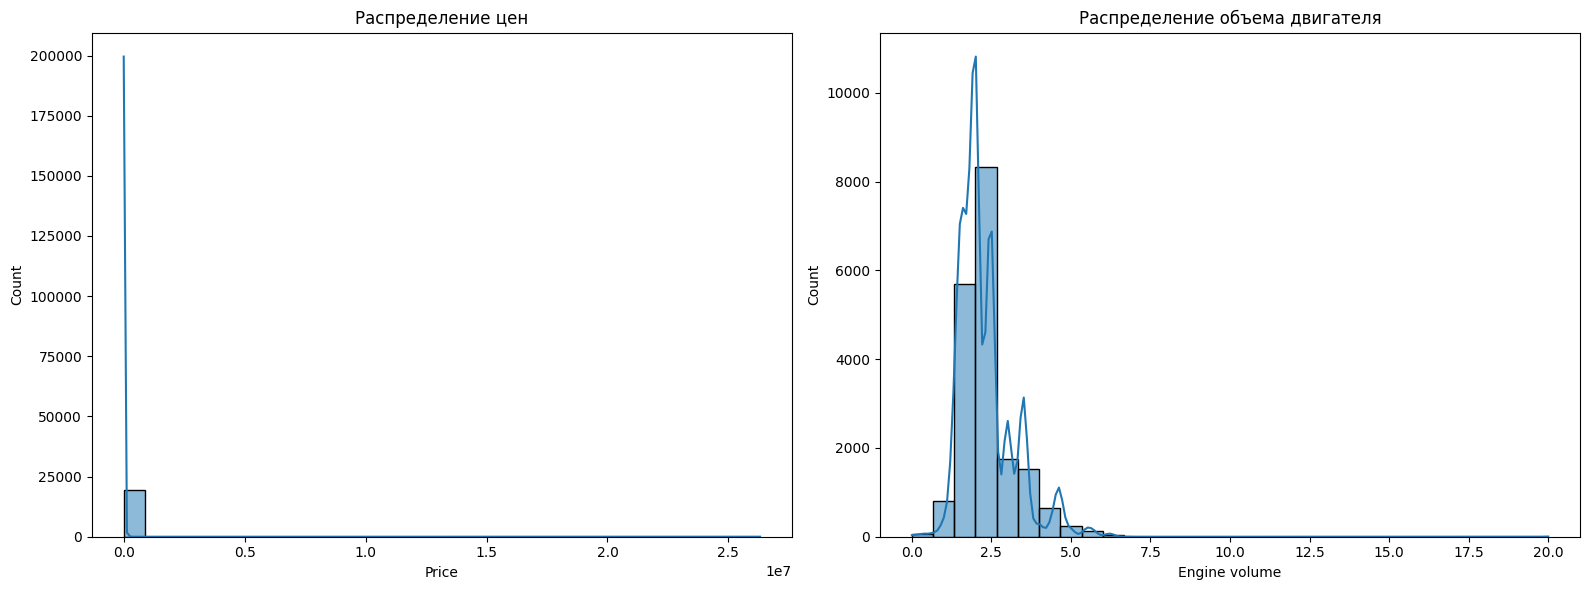

              Price          Levy       Mileage  Engine volume     Cylinders  \
count  1.923700e+04  19237.000000  1.923700e+04   19237.000000  19237.000000   
mean   1.855593e+04    632.528669  1.532236e+06       2.307990      4.582991   
std    1.905813e+05    567.721688  4.840387e+07       0.877805      1.199933   
min    1.000000e+00      0.000000  0.000000e+00       0.000000      1.000000   
25%    5.331000e+03      0.000000  7.013900e+04       1.800000      4.000000   
50%    1.317200e+04    642.000000  1.260000e+05       2.000000      4.000000   
75%    2.207500e+04    917.000000  1.888880e+05       2.500000      4.000000   
max    2.630750e+07  11714.000000  2.147484e+09      20.000000     16.000000   

            Airbags  
count  19237.000000  
mean       6.582627  
std        4.320168  
min        0.000000  
25%        4.000000  
50%        6.000000  
75%       12.000000  
max       16.000000  


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 6))

# Гистограмма цен автомобилей
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Распределение цен')

# Гистограмма объема двигателя
plt.subplot(1, 2, 2)
sns.histplot(df['Engine volume'], kde=True, bins=30)
plt.title('Распределение объема двигателя')

plt.tight_layout()
plt.show()

print(df[['Price', 'Levy', 'Mileage', 'Engine volume', 'Cylinders', 'Airbags']].describe())


## Тут видны явные выбросы

In [4]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.15)
    Q3 = df[column].quantile(0.85)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


df_cleaned = remove_outliers_iqr(df, 'Price')
df_cleaned = remove_outliers_iqr(df_cleaned, 'Mileage')

print("Размер данных до очистки:", df.shape)
print("Размер данных после очистки:", df_cleaned.shape)


Размер данных до очистки: (19237, 18)
Размер данных после очистки: (18713, 18)


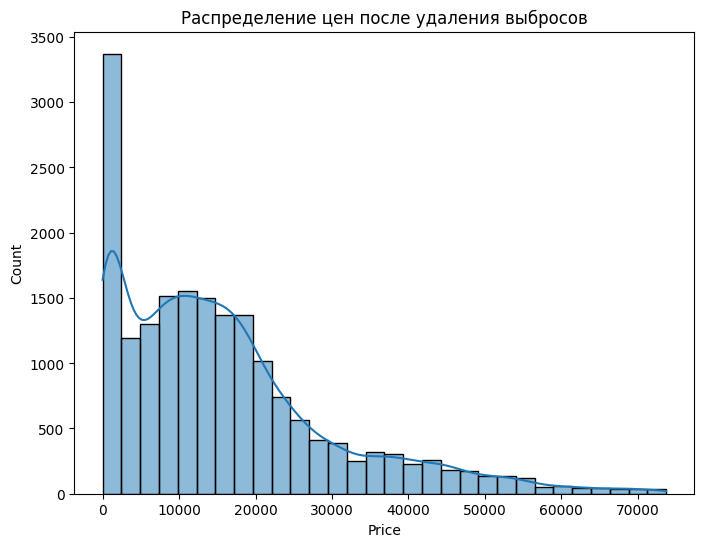

In [5]:
# Повторим график распределения цен после удаления выбросов
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Price'], kde=True, bins=30)
plt.title('Распределение цен после удаления выбросов')
plt.show()


In [6]:
df_cleaned.sort_values(by='Price').head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
16992,45772201,1,1202.0,CHEVROLET,Lacetti,2006,Hatchback,0,Petrol,1.6,200000.0,4.0,Manual,Front,4,Left wheel,Black,2
7815,45765530,1,0.0,OPEL,Astra,1999,Sedan,1,Petrol,1.6,122231.0,4.0,Manual,Front,4,Left wheel,Silver,4
17596,45776620,3,0.0,HYUNDAI,Sonata,2011,Sedan,1,Petrol,2.4,106422.0,4.0,Tiptronic,Front,4,Left wheel,White,6
7276,45814977,3,0.0,MERCEDES-BENZ,G 55 AMG,2020,Jeep,1,LPG,1.8,1212.0,12.0,Manual,4x4,4,Left wheel,Purple,0
221,45612423,3,0.0,HYUNDAI,Elantra,2011,Sedan,1,Petrol,1.8,80000.0,4.0,Tiptronic,Front,4,Left wheel,Grey,6


## Все равно серьезные выбросы

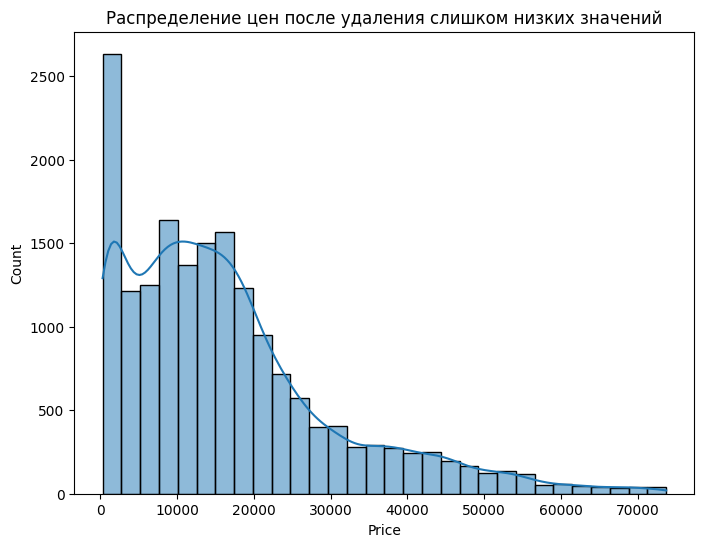

In [7]:
min_price_threshold = 300


df_cleaned = df_cleaned[df_cleaned['Price'] >= min_price_threshold]

# Проверим новое распределение цен после удаления подозрительно низких значений
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Price'], kde=True, bins=30)
plt.title('Распределение цен после удаления слишком низких значений')
plt.show()



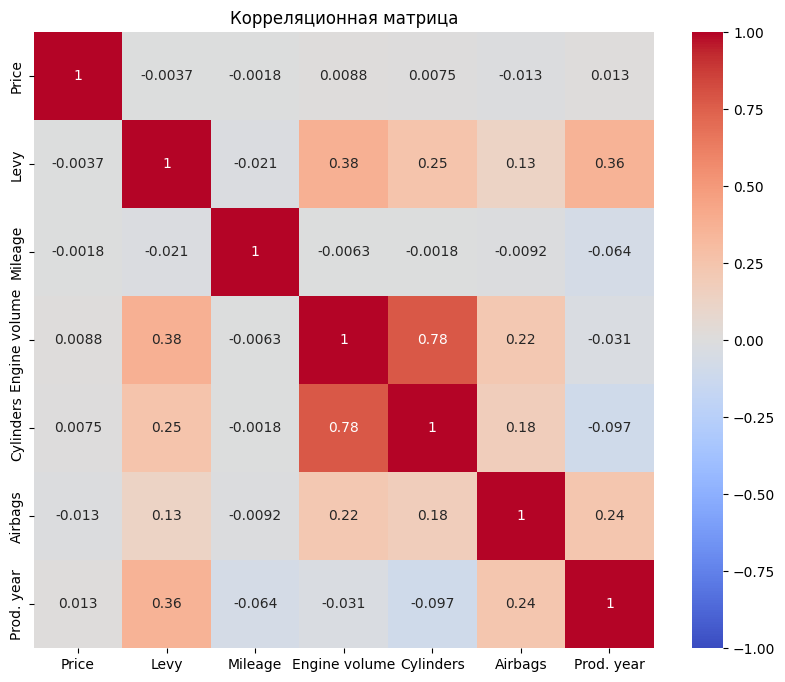

In [8]:
# Корреляционная матрица для числовых признаков
plt.figure(figsize=(10, 8))
corr_matrix = df[['Price', 'Levy', 'Mileage', 'Engine volume', 'Cylinders', 'Airbags','Prod. year']].corr()

# Построение тепловой карты корреляций
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляционная матрица')
plt.show()


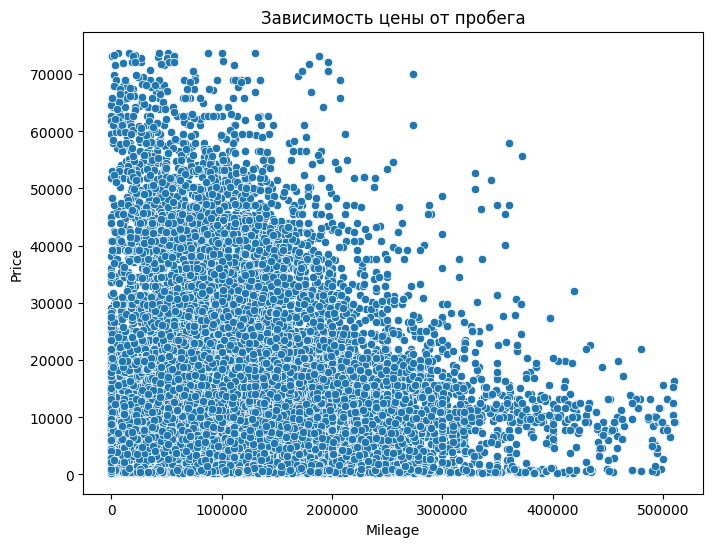

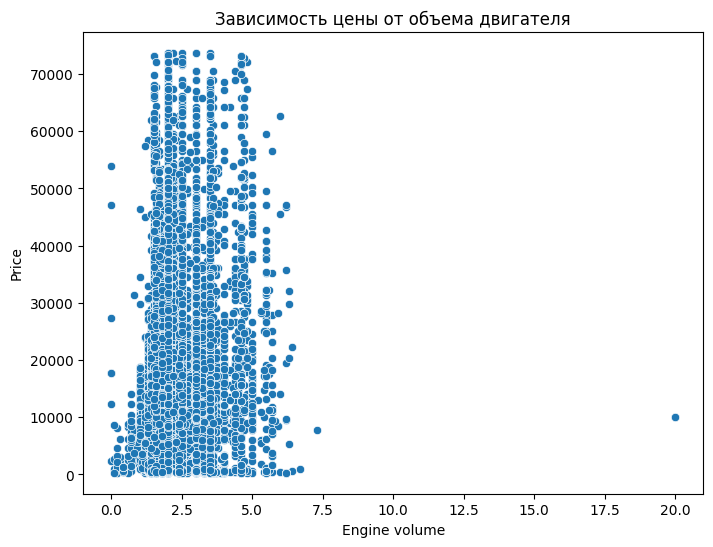

In [9]:
# Взаимосвязь цены и пробега
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned['Mileage'], y=df_cleaned['Price'])
plt.title('Зависимость цены от пробега')
plt.show()

# Взаимосвязь цены и объема двигателя
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned['Engine volume'], y=df_cleaned['Price'])
plt.title('Зависимость цены от объема двигателя')
plt.show()


In [10]:
# Создание новых признаков
df['Car Age'] = 2024 - df['Prod. year']
df['Price per Mileage'] = df['Price'] / df['Mileage']

# Проверим корреляцию этих новых признаков с ценой
print(df[['Car Age','Price per Mileage']].corr())


                    Car Age  Price per Mileage
Car Age            1.000000          -0.023791
Price per Mileage -0.023791           1.000000


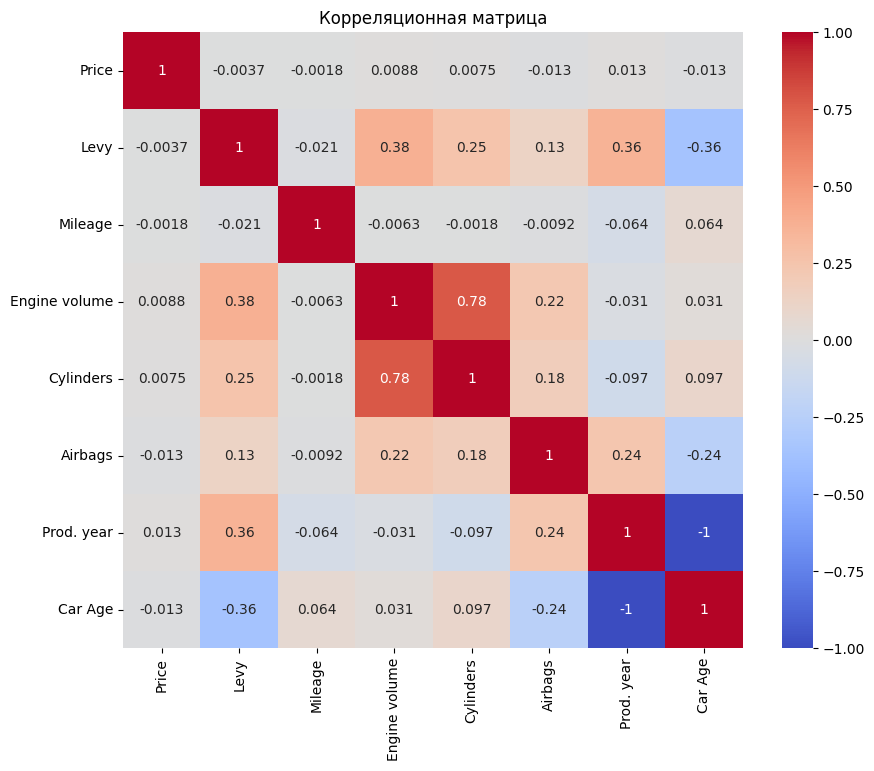

In [11]:
# Корреляционная матрица для числовых признаков
plt.figure(figsize=(10, 8))
corr_matrix = df[['Price', 'Levy', 'Mileage', 'Engine volume', 'Cylinders', 'Airbags','Prod. year', 'Car Age']].corr()

# Построение тепловой карты корреляций
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляционная матрица')
plt.show()

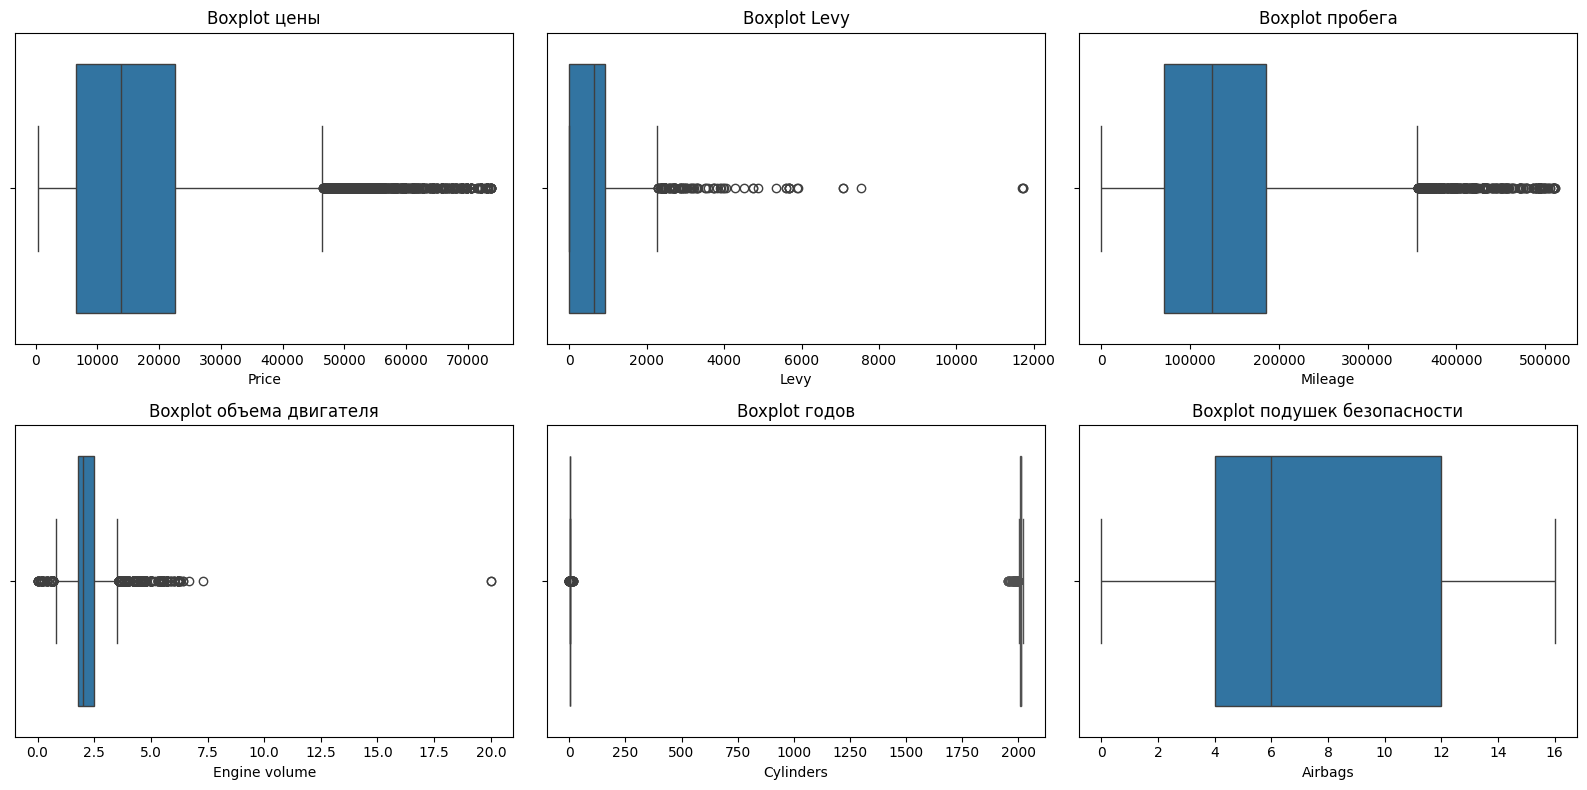

In [12]:
# Построим boxplot для основных числовых признаков, чтобы визуально выявить выбросы
plt.figure(figsize=(16, 8))

# Boxplot для цены
plt.subplot(2, 3, 1)
sns.boxplot(x=df_cleaned['Price'])
plt.title('Boxplot цены')

# Boxplot для налога Levy
plt.subplot(2, 3, 2)
sns.boxplot(x=df_cleaned['Levy'])
plt.title('Boxplot Levy')

# Boxplot для пробега
plt.subplot(2, 3, 3)
sns.boxplot(x=df_cleaned['Mileage'])
plt.title('Boxplot пробега')

# Boxplot для объема двигателя
plt.subplot(2, 3, 4)
sns.boxplot(x=df_cleaned['Engine volume'])
plt.title('Boxplot объема двигателя')

# Boxplot для количества цилиндров
plt.subplot(2, 3, 5)
sns.boxplot(x=df_cleaned['Cylinders'])
plt.title('Boxplot цилиндров')

# Boxplot для года выпуска
plt.subplot(2, 3, 5)
sns.boxplot(x=df_cleaned['Prod. year'])
plt.title('Boxplot годов')


# Boxplot для количества подушек безопасности
plt.subplot(2, 3, 6)
sns.boxplot(x=df_cleaned['Airbags'])
plt.title('Boxplot подушек безопасности')

plt.tight_layout()
plt.show()


In [13]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


df_cleaned = remove_outliers_iqr(df_cleaned, 'Levy')
df_cleaned = remove_outliers_iqr(df_cleaned, 'Engine volume')





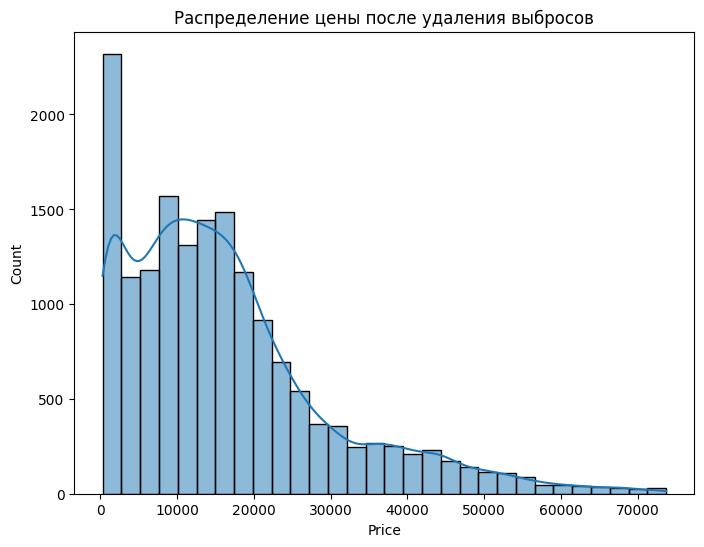

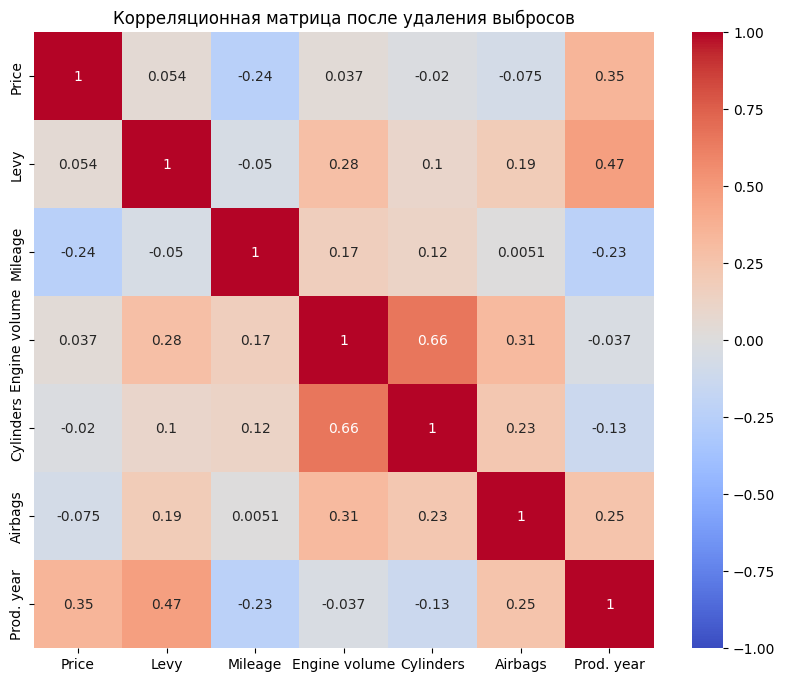

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Price'], kde=True, bins=30)
plt.title('Распределение цены после удаления выбросов')
plt.show()

# Корреляционная матрица после очистки
plt.figure(figsize=(10, 8))
corr_matrix_cleaned = df_cleaned[['Price', 'Levy', 'Mileage', 'Engine volume', 'Cylinders', 'Airbags','Prod. year']].corr()
sns.heatmap(corr_matrix_cleaned, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляционная матрица после удаления выбросов')
plt.show()


In [15]:
df_cleaned.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4,Left wheel,Black,8
2,45774419,8467,0.0,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000.0,4.0,Variator,Front,4,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Left wheel,Silver,4


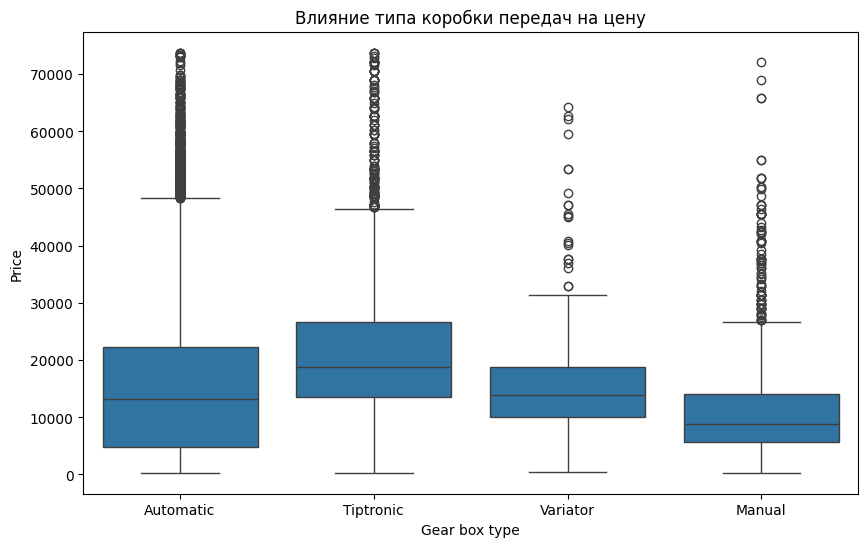

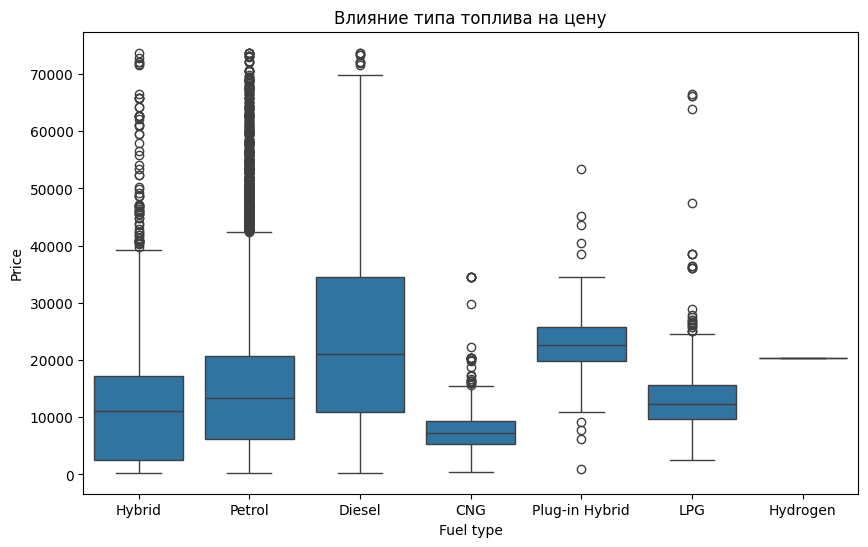

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

#boxplot для цены в зависимости от коробки передач
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gear box type', y='Price', data=df_cleaned)
plt.title('Влияние типа коробки передач на цену')
plt.show()

#boxplot для цены в зависимости от типа топлива
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel type', y='Price', data=df_cleaned)
plt.title('Влияние типа топлива на цену')
plt.show()


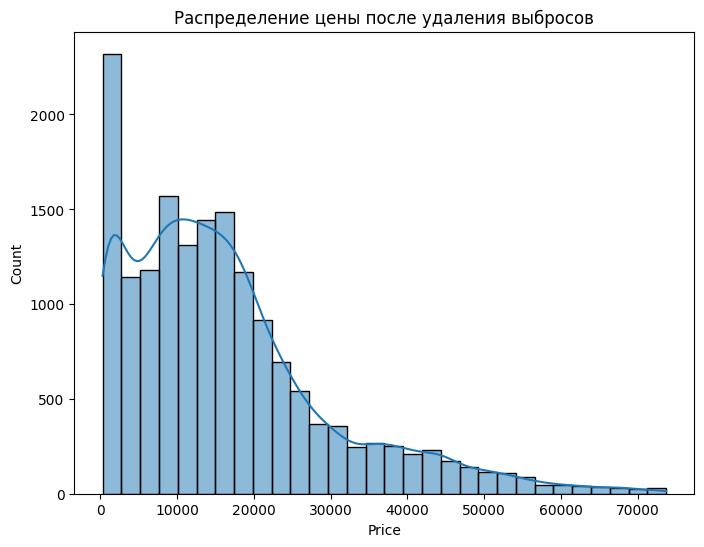

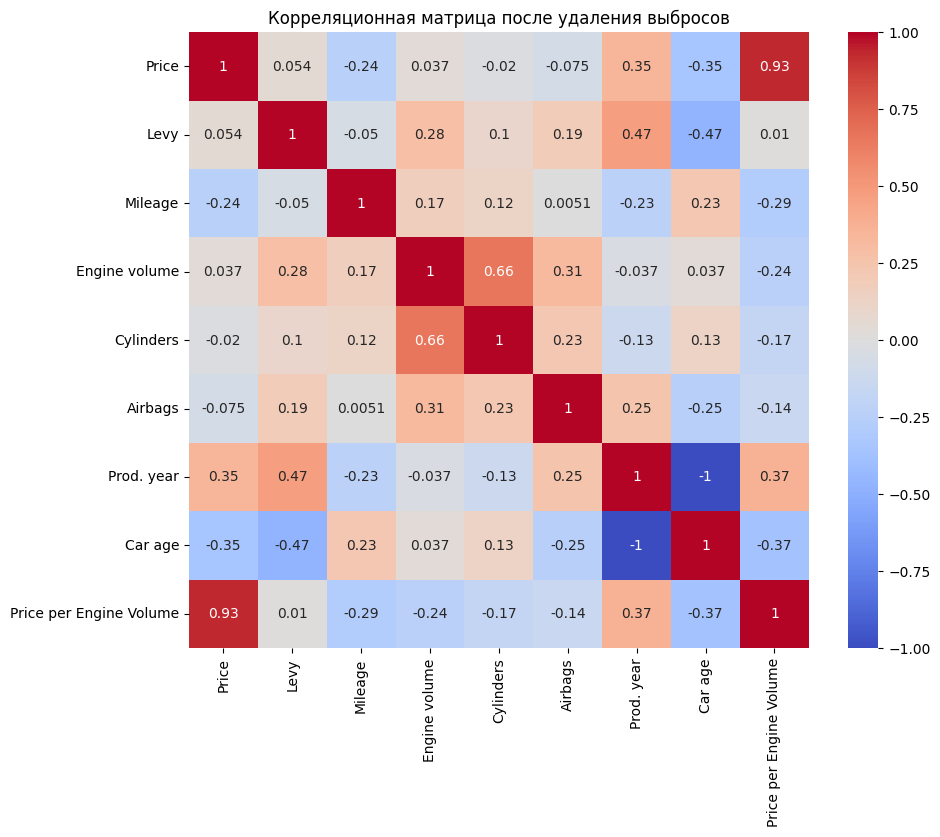

In [17]:
df_cleaned['Car age'] = 2024 - df_cleaned['Prod. year']
df_cleaned['Price per Engine Volume'] = df_cleaned['Price'] / df_cleaned['Engine volume']


plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Price'], kde=True, bins=30)
plt.title('Распределение цены после удаления выбросов')
plt.show()


plt.figure(figsize=(10, 8))
corr_matrix_cleaned = df_cleaned[['Price', 'Levy', 'Mileage', 'Engine volume', 'Cylinders', 'Airbags','Prod. year','Car age','Price per Engine Volume']].corr()
sns.heatmap(corr_matrix_cleaned, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляционная матрица после удаления выбросов')
plt.show()


In [18]:
features = ['Car age', 'Prod. year', 'Mileage', 'Engine volume', 'Levy']
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


X = df_cleaned[features]
y = df_cleaned['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE модели: {rmse}")


RMSE модели: 10078.745012248599


C:\книга_по_ML\myvenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [19]:
df_cleaned['Price'].describe()

count    16593.000000
mean     16470.300127
std      13616.071639
min        300.000000
25%       6743.000000
50%      13799.000000
75%      21953.000000
max      73714.000000
Name: Price, dtype: float64

In [20]:
categorical_features = ['Fuel type', 'Gear box type', 'Manufacturer']


df_encoded = pd.get_dummies(df_cleaned, columns=categorical_features, drop_first=True)


numeric_features = ['Car age', 'Prod. year', 'Mileage', 'Engine volume', 'Levy']


features = numeric_features + [col for col in df_encoded.columns if col.startswith(('Fuel type_', 'Gear box type_', 'Manufacturer_'))]


X = df_encoded[features]
y = df_cleaned['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE модели с категориальными признаками: {rmse}")


RMSE модели с категориальными признаками: 7602.8395336791955


C:\книга_по_ML\myvenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [21]:
model.score(X_test, y_test)

0.6851934888642763